## Project setup
Import the necessary modules and helper functions

In [1]:
import Helper_funcs
import matplotlib as plt
import seaborn as sns
import os

Define the path for the data source

In [2]:
path = os.path.dirname(os.getcwd())
filename= "data\knmi_data.txt"
data_source = os.path.join(path,filename)

## Initial data collection
Read the data

In [3]:
columns = ['station', 'datum', 'T_gem', 'T_min', 'T_max', 'Neerslag']
df = Helper_funcs.read_csv(data_source,columns)

## Data exploration
Take a first glance at the data

In [4]:
df.head(5)

T_gem  T_min  T_max  Neerslag
station datum                                    
278     2011-02-01    -18    -38     11        15
        2011-02-02     29     11     40         3
        2011-02-03     52     30     80        14
        2011-02-04     90     61    109        16
        2011-02-05    114    107    120         0

Restructure the data to represent degrees in celsius with decimal values

In [5]:
temp_subset = df[["T_gem","T_min","T_max"]]/10
df = temp_subset.merge(df["Neerslag"], on=["station","datum"])
df

T_gem  T_min  T_max  Neerslag
station datum                                    
278     2011-02-01   -1.8   -3.8    1.1        15
        2011-02-02    2.9    1.1    4.0         3
        2011-02-03    5.2    3.0    8.0        14
        2011-02-04    9.0    6.1   10.9        16
        2011-02-05   11.4   10.7   12.0         0
...                   ...    ...    ...       ...
        2021-01-30   -0.4   -4.2    1.6         0
        2021-01-31   -2.7   -6.4    0.7         0
        2021-02-01    0.0   -0.9    0.9         2
        2021-02-02    2.2    0.0    7.7        23
        2021-02-03    8.1    6.1    9.5       183

[3656 rows x 4 columns]

Explore the size of the dataset, see how many rows and columns it has

In [6]:
df.shape

(3656, 4)

Check for any null values in the dataset

In [7]:
df.isnull().sum()

T_gem       0
T_min       0
T_max       0
Neerslag    0
dtype: int64

Get a statistical overview of the dataset

In [8]:
df.describe()

,T_gem,T_min,T_max,Neerslag
count,3656.000000,3656.000000,3656.000000,3656.000000
mean,10.502790,5.933807,14.826286,20.448578
std,6.193901,5.640661,7.319153,41.534217
min,-12.100000,-17.900000,-5.400000,-1.000000
25%,6.000000,1.900000,9.200000,0.000000
50%,10.300000,6.050000,14.700000,1.000000
75%,15.300000,10.300000,20.400000,22.000000
max,28.000000,19.800000,39.300000,556.000000


Visualize the distribution of the dataset

array([<Axes: xlabel='station,datum'>, <Axes: xlabel='station,datum'>,
       <Axes: xlabel='station,datum'>, <Axes: xlabel='station,datum'>],
      dtype=object)

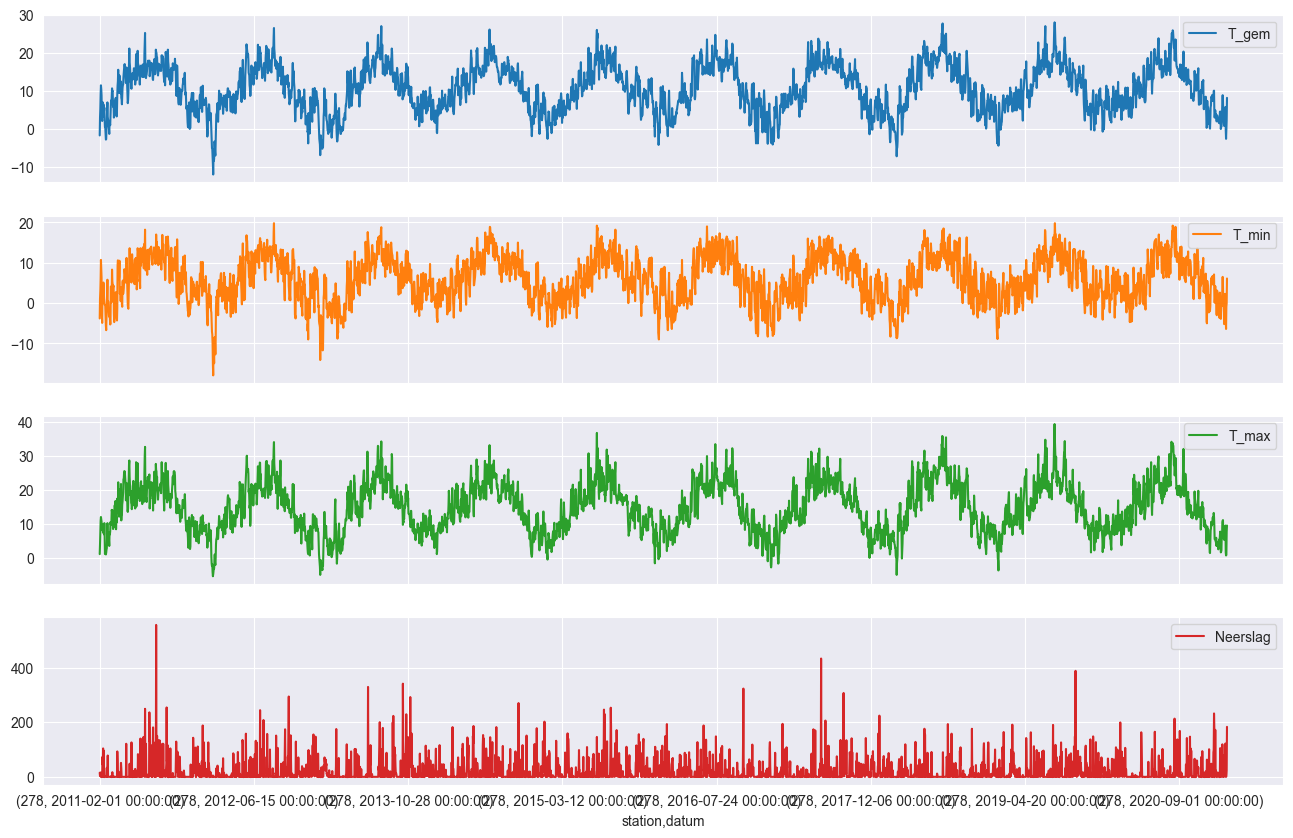

In [9]:
df.plot(figsize=(16,10),subplots=True)

Comments about discoveries based on this visualization
-
-




<Axes: >

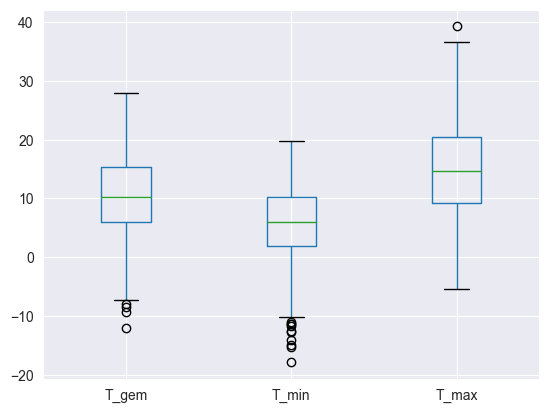

In [10]:
df.boxplot(column=["T_gem","T_min","T_max"])

Comments about discoveries based on this visualization
-
-




<Axes: >

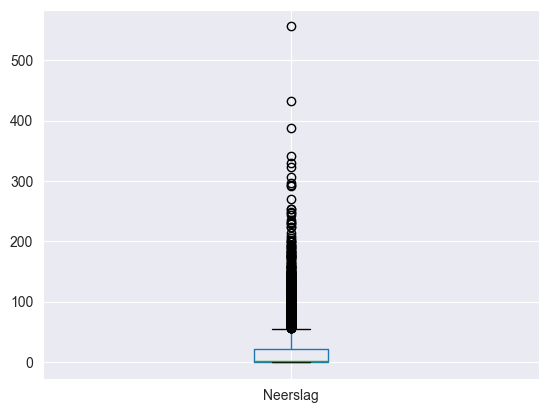

In [11]:
df.boxplot(column=["Neerslag"])

Comments about discoveries based on this visualization
-
-




array([[<Axes: title={'center': 'T_gem'}>,
        <Axes: title={'center': 'T_min'}>],
       [<Axes: title={'center': 'T_max'}>,
        <Axes: title={'center': 'Neerslag'}>]], dtype=object)

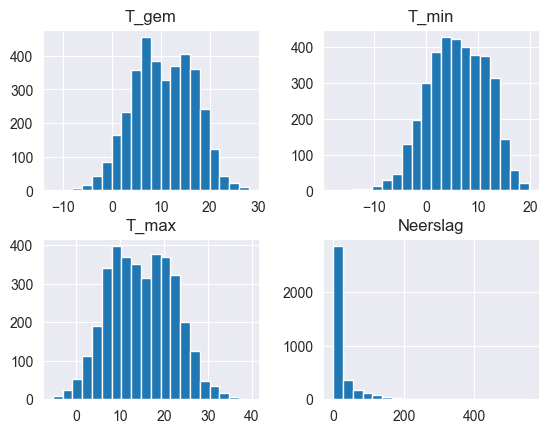

In [12]:
df.hist(bins=20)

## Turkey Fence analysis
1) sort the array and create new variable for column average temperature

In [13]:
Average_temp = df["T_gem"].sort_values()

2) define the quartiles

In [14]:
size = len(df)
Q1_index = int(size/4)
Q2_index = int(size/2)
Q3_index = int(size - Q1_index)

TF_averageQ1 = Average_temp.iloc[:Q1_index]
TF_averageQ2 = Average_temp.iloc[Q1_index:Q2_index]
TF_averageQ3 = Average_temp.iloc[Q2_index:Q3_index]
TF_averageQ4 = Average_temp.iloc[Q3_index:]

maxQ1 = max(TF_averageQ1)
maxQ3 = max(TF_averageQ3)

IQR = (maxQ3 - maxQ1)
IQR


9.3

In [15]:
quantiles = df.quantile([.25, .5, .75], axis = 0).reset_index()

Q1 = quantiles.iloc[-1:].pivot_table(index="index",columns=["T_gem","T_min","T_max","Neerslag"])
Q3 = quantiles.iloc[:1]
print(Q3)
print(Q1)
# for row,column in Q3.iterrows():
#     print(Q3.iloc[row:column])
# print(Q3["T_gem"] - Q1["T_gem"])
# print(Q3)

# IQR = quantiles[quantiles.iloc[:-1,:]-]

   index  T_gem  T_min  T_max  Neerslag
0   0.25    6.0    1.9    9.2       0.0
Empty DataFrame
Columns: []
Index: [0.75]


In [16]:
import numpy as np


def detect_outliers_tukey(x, k=1.5):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    fence_low = q1 - k * iqr
    fence_high = q3 + k * iqr
    outliers = (x < fence_low) | (x > fence_high)
    return outliers

In [17]:
Q1 = df['T_gem'].describe()['25%']
Q3 = df['T_gem'].describe()['75%']
IQR = Q3 - Q1
IQR

9.3

In [18]:
IQR = Helper_funcs.calculate_iqr(df['T_gem'])
IQR

9.3

In [20]:
result = Helper_funcs.calculate_tukey(df["T_gem"])
result

[-7.950000000000001, 9.3, 29.25]

In [19]:
outliers = detect_outliers_tukey(df["T_gem"])
outliers

station  datum     
278      2011-02-01    False
         2011-02-02    False
         2011-02-03    False
         2011-02-04    False
         2011-02-05    False
                       ...  
         2021-01-30    False
         2021-01-31    False
         2021-02-01    False
         2021-02-02    False
         2021-02-03    False
Name: T_gem, Length: 3656, dtype: bool